<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   name                            101808 non-null  object        
 2   host_id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host_name                       101654 non-null  object        
 5   neighbourhood_group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country_code                    101927 non-null  object      

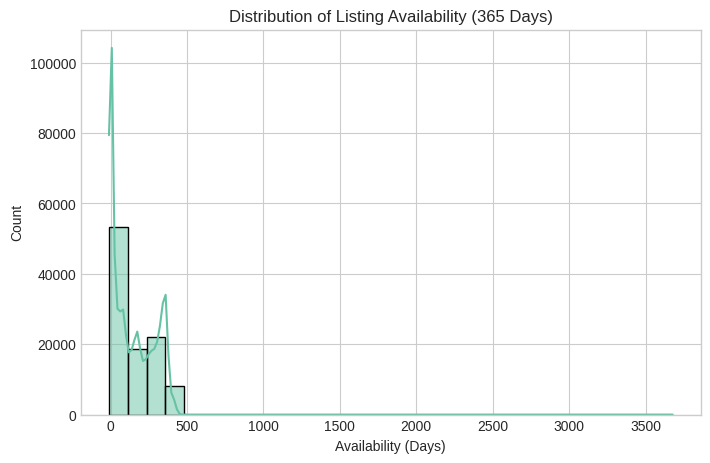

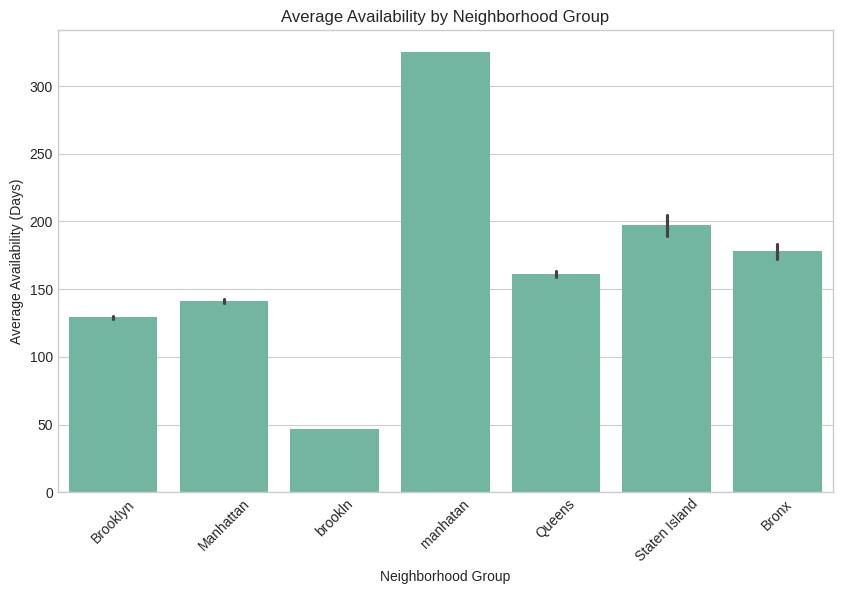

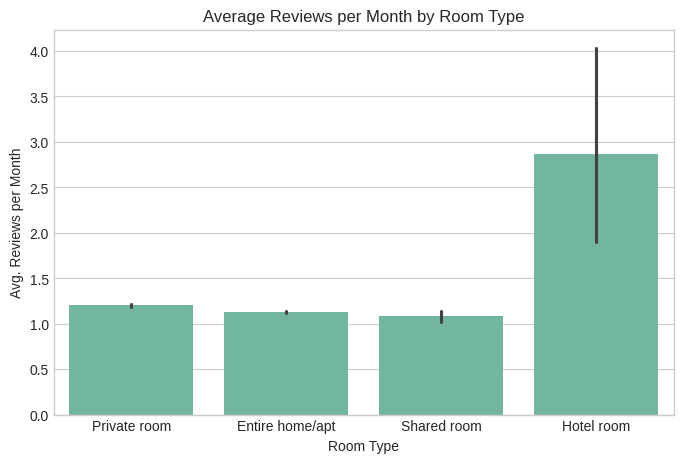

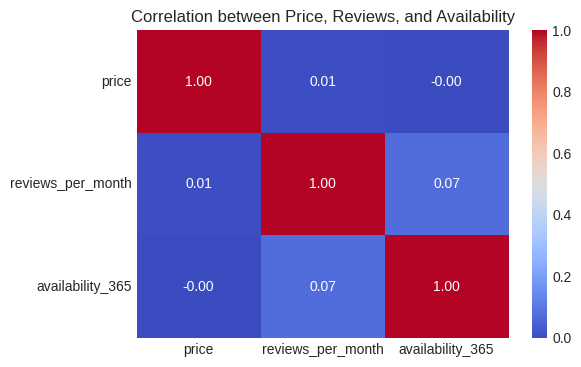

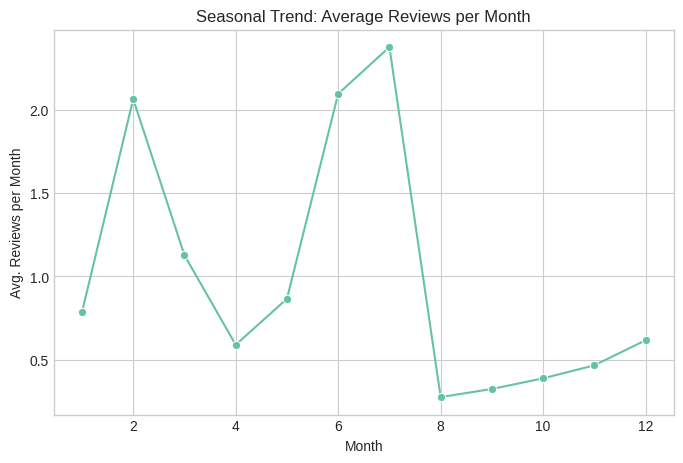

Listings Available More than 300 Days per Year: 20576
High-Demand Listings (Reviews > 5 per Month): 3084

Top 10 Neighborhoods by Total Reviews:
 neighbourhood
Bedford-Stuyvesant    271748.0
Williamsburg          191119.0
Harlem                179229.0
Bushwick              123381.0
Hell's Kitchen        111314.0
East Village           97393.0
Crown Heights          89414.0
East Harlem            82668.0
Upper West Side        77544.0
Upper East Side        70032.0
Name: number_of_reviews, dtype: float64


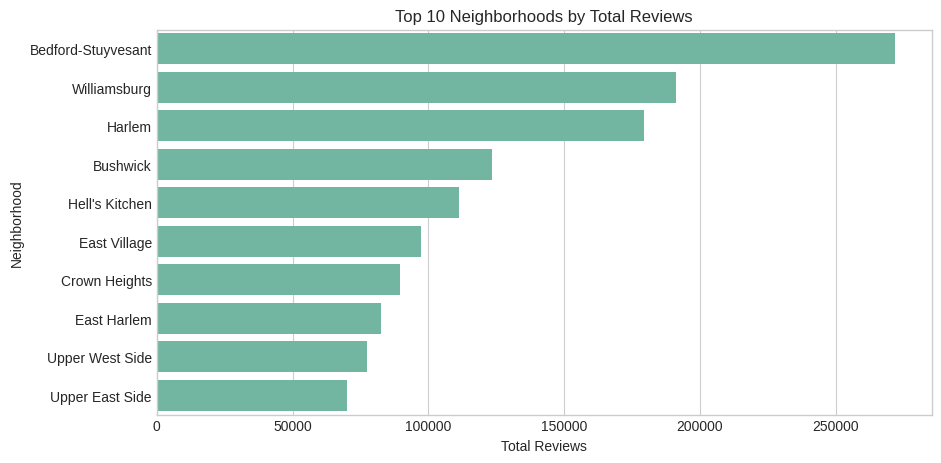

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/1730285881-Airbnb_Open_Data.csv", low_memory=False)


df.head()



# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert price and service_fee to numeric
for col in ['price', 'service_fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'last_review' to datetime
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Fill missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['availability_365'] = df['availability_365'].fillna(0)
df['price'] = df['price'].fillna(df['price'].median())

# Check cleaned data info
df.info()



# Basic Statistics
print("Basic Statistics:\n", df[['price', 'reviews_per_month', 'availability_365']].describe())

# Distribution of Availability
plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.title("Distribution of Listing Availability (365 Days)")
plt.xlabel("Availability (Days)")
plt.ylabel("Count")
plt.show()

# Availability by Neighborhood Group
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='neighbourhood_group', y='availability_365', estimator=np.mean)
plt.title("Average Availability by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Availability (Days)")
plt.xticks(rotation=45)
plt.show()

# Reviews per Month by Room Type
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='room_type', y='reviews_per_month', estimator=np.mean)
plt.title("Average Reviews per Month by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Avg. Reviews per Month")
plt.show()



# Correlation Heatmap
corr = df[['price', 'reviews_per_month', 'availability_365']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Price, Reviews, and Availability")
plt.show()

# Seasonal Trends: Monthly Review Pattern
if 'last_review' in df.columns:
    df['month'] = df['last_review'].dt.month
    monthly_reviews = df.groupby('month')['reviews_per_month'].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.lineplot(data=monthly_reviews, x='month', y='reviews_per_month', marker='o')
    plt.title("Seasonal Trend: Average Reviews per Month")
    plt.xlabel("Month")
    plt.ylabel("Avg. Reviews per Month")
    plt.show()


# 1 Filter: Highly Available Listings (Over 300 days open)
high_availability = df[df['availability_365'] > 300]
print("Listings Available More than 300 Days per Year:", len(high_availability))

# 2 Filter: High-Demand Listings (More than 5 reviews per month)
high_demand = df[df['reviews_per_month'] > 5]
print("High-Demand Listings (Reviews > 5 per Month):", len(high_demand))

# 3 Filter: Top 10 Neighborhoods with Most Reviews
top_neighborhoods = (df.groupby('neighbourhood')['number_of_reviews']
                     .sum()
                     .sort_values(ascending=False)
                     .head(10))
print("\nTop 10 Neighborhoods by Total Reviews:\n", top_neighborhoods)
plt.figure(figsize=(10,5))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, orient='h')
plt.title("Top 10 Neighborhoods by Total Reviews")
plt.xlabel("Total Reviews")
plt.ylabel("Neighborhood")
plt.show()